In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#한글 컬럼명 출력
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts\gulim.ttc'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [124]:
train=pd.read_csv('D:\machine_learning_Data\\train_data.csv', encoding='CP949')
train

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19


# train_data 정보 탐색

In [79]:
train.shape

(240921, 8)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240921 entries, 0 to 240920
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       240921 non-null  object 
 1   단지명       240921 non-null  object 
 2   전용면적(㎡)   240921 non-null  float64
 3   계약년월      240921 non-null  int64  
 4   거래금액(만원)  240921 non-null  int64  
 5   층         240921 non-null  int64  
 6   건축년도      240921 non-null  int64  
 7   도로명       240921 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.7+ MB


In [99]:
train.describe()

,전용면적(㎡),계약년월,거래금액(만원),층,건축년도
count,240921.000000,240921.000000,240921.000000,240921.000000,240921.000000
mean,77.932687,201907.760590,77450.865790,9.117192,2000.225377
std,30.414776,83.470399,54710.422008,6.167072,9.667101
min,10.020000,201801.000000,5400.000000,-3.000000,1961.000000
25%,59.720000,201808.000000,42800.000000,4.000000,1994.000000
50%,83.420000,201909.000000,63000.000000,8.000000,2001.000000
75%,84.970000,202005.000000,92000.000000,13.000000,2007.000000
max,395.060000,202012.000000,840000.000000,69.000000,2021.000000


## 결측치 찾기

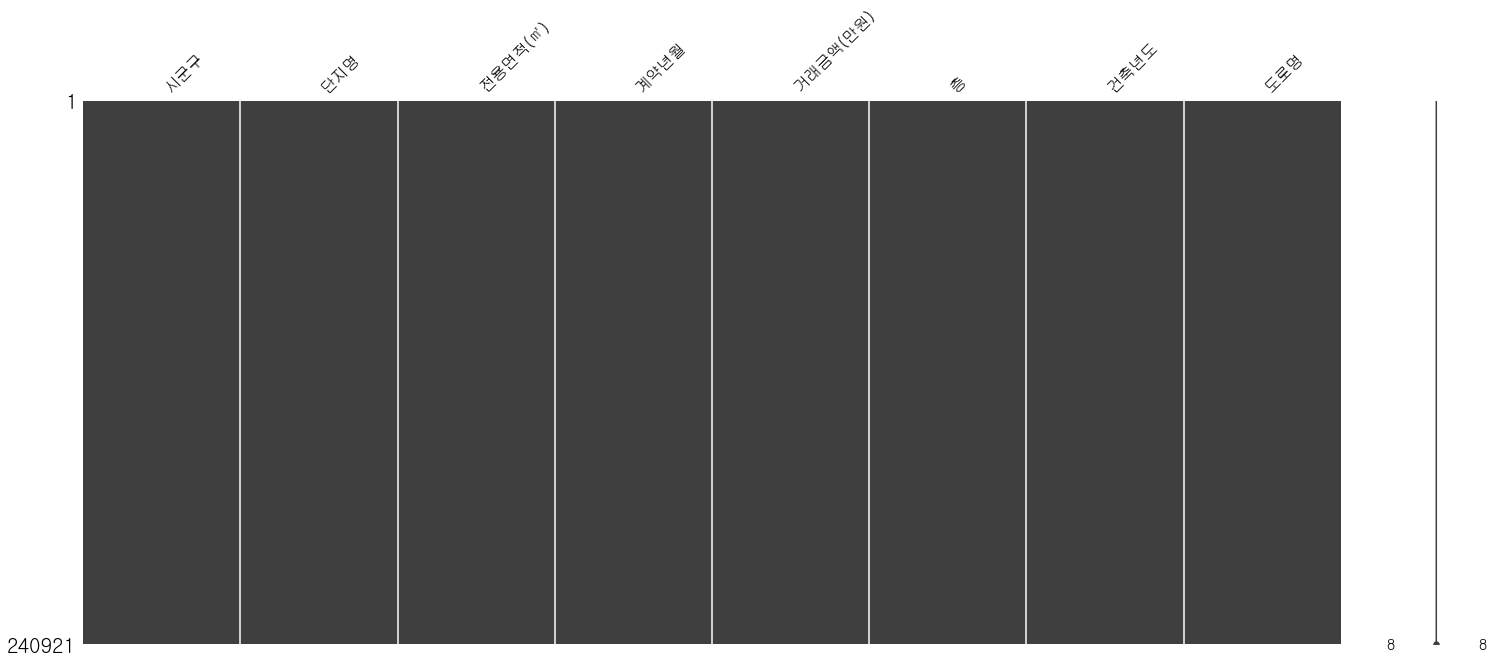

In [71]:
import missingno
missingno.matrix(train)
plt.show()
# 결론 : 결측치는 없다.

In [82]:
year_of_construction=train['건축년도'].sort_values(ascending=True).values
dedicated_area=train['전용면적(㎡)'].sort_values(ascending=True).values

In [83]:
type(year_of_construction)

numpy.ndarray

## 건축년도

## 빈도수

### 서울 아파트는 언제 많이 완공 되었을까?

In [135]:
train['건축년도'].value_counts()

2004    13400
2003    13111
1999    12483
2000    11935
1988    11635
2005     9452
1998     9302
1997     8704
2001     8454
2002     8185
2008     8071
2006     6807
1996     6706
1993     6531
1992     6389
2007     5913
2014     5905
1995     5873
1994     5392
1987     5311
2009     5252
2010     5252
2011     5236
1989     4720
1986     4699
2016     4530
2012     4241
2013     4115
2015     3660
1991     3354
1990     3212
2018     3031
2017     2782
2019     2531
1983     1960
1984     1813
1985     1588
1978     1325
2020     1179
1982     1106
1979     1020
1981      822
1976      614
1974      594
1980      583
1971      473
1975      467
1977      452
1973      219
1970      179
1972      139
1969      123
1968       46
1961       17
1966       17
2021        6
1965        3
1967        2
Name: 건축년도, dtype: int64

<AxesSubplot:>

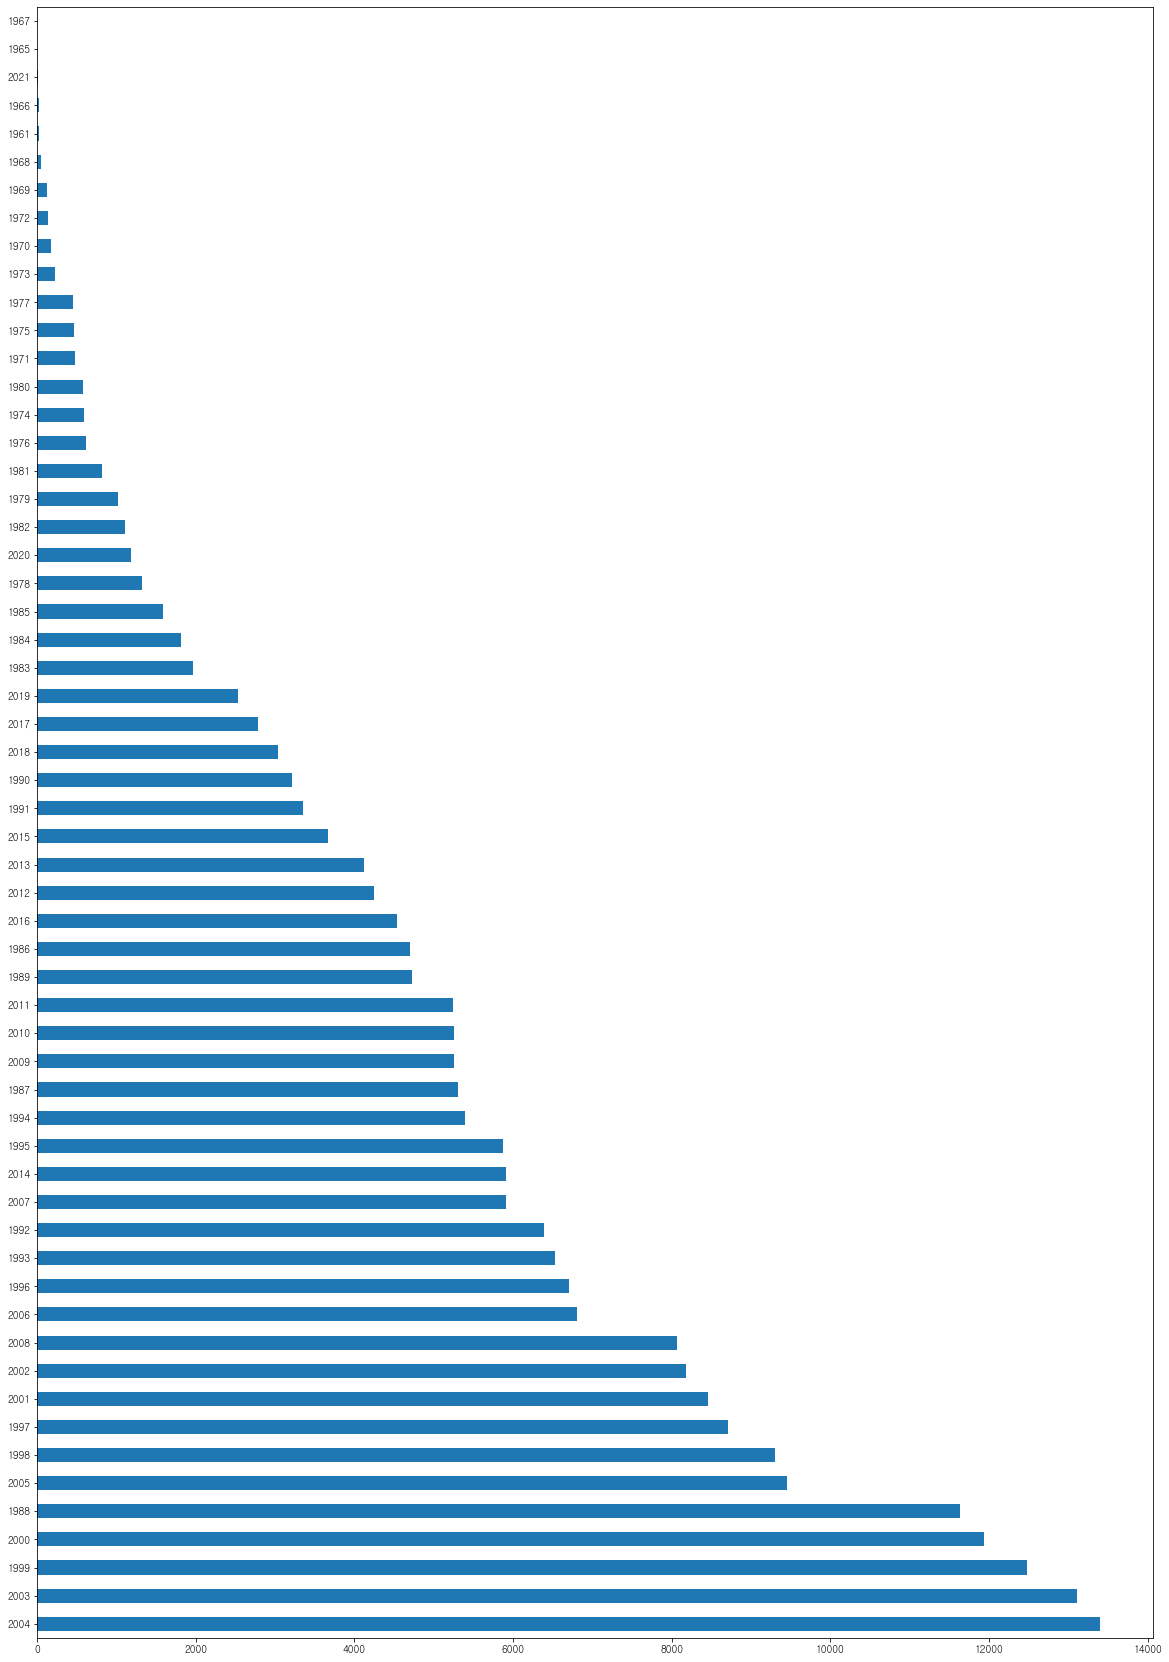

In [143]:
plt.figure(figsize=(20,30))
train['건축년도'].value_counts().plot.barh()

## 이상치 찾기

In [85]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

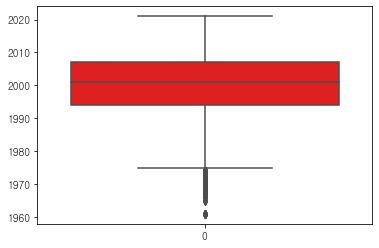

In [116]:
#boxplot으로 이상치 분포도 확인하기
plt.figure()
sns.boxplot(data=train['건축년도'], color='red')
plt.show()

In [101]:
#건축년도 조회
train['건축년도'].describe(include='all')

count    240921.000000
mean       2000.225377
std           9.667101
min        1961.000000
25%        1994.000000
50%        2001.000000
75%        2007.000000
max        2021.000000
Name: 건축년도, dtype: float64

In [90]:
#IQR을 적용하기 위해 q1, q3를 quantilte함수를 이용해 찾아내기.
q1=train['건축년도'].quantile(0.25)
q3=train['건축년도'].quantile(0.75)
IQR=q3-q1
IQR

13.0

In [96]:
#boxplot에서 아래쪽에 이상치가 분포해있었으므로 q1값을 이용해 분리 후 IQR_condition에 저장
IQR_condition=train['건축년도']<q1-1.5*IQR
#건축년도 오름차순 기준으로 이상치 데이터 확인하기
train[IQR_condition].sort_values(by=['건축년도'], axis=0)

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
178538,서울특별시 구로구 구로동,(718-18)삼성빌라트,54.16,202008,21000,5,1961,구로동로15길 27
178557,서울특별시 구로구 구로동,(740-33),55.63,202001,12000,4,1961,구로동로22길 42
178731,서울특별시 구로구 구로동,(780-86),35.55,202007,13500,2,1961,도림로12길 11
178732,서울특별시 구로구 구로동,(780-86),35.55,202011,13500,5,1961,도림로12길 11
20513,서울특별시 구로구 구로동,(805-16),60.60,201801,17500,5,1961,도림로3길 3-3
...,...,...,...,...,...,...,...,...
72530,서울특별시 용산구 이촌동,빌라맨션,174.48,201801,138000,17,1974,이촌로 156
72529,서울특별시 용산구 이촌동,빌라맨션,174.48,201801,125000,16,1974,이촌로 156
72397,서울특별시 용산구 이촌동,노들,230.25,201809,137000,1,1974,이촌로64길 20
72614,서울특별시 용산구 이촌동,점보,177.62,201802,119500,7,1974,이촌로88길 3


In [195]:
#계약년월 분리 - 건축년도와 연관이 있을까
#구축이냐 신축이냐에 따라 계약 건수 차이가 있을까?

## 계약년월
# 계약년도와 계약월 컬럼 생성(EDA)
train['계약년도'] = train['계약년월'].map(lambda x : str(x)[:4])
train['계약월'] = train['계약년월'].map(lambda x : int(str(x)[4:]))

<Figure size 1440x3600 with 0 Axes>

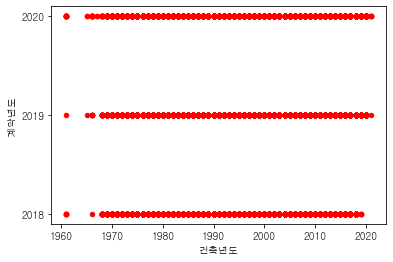

In [208]:
plt.figure(figsize=(20,50))
train_years=train[['건축년도','계약년도','계약월']]
train_years.plot.scatter(x='건축년도',y='계약년도', c='red')
plt.show()

Text(0, 0.5, '2020년도 계약월')

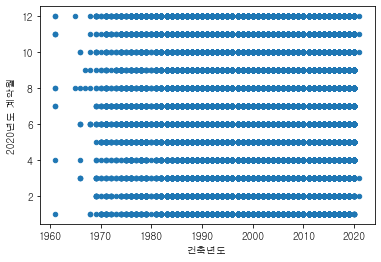

In [226]:
#건축년도를 기준으로 2018, 2019, 2020별로 계약월별 산점도 보여주기.
train_years.groupby('계약년도').get_group('2020').plot.scatter(x='건축년도',y='계약월')
plt.ylabel('2020년도 계약월')

Text(0, 0.5, '2019년도 계약월')

<Figure size 1440x3600 with 0 Axes>

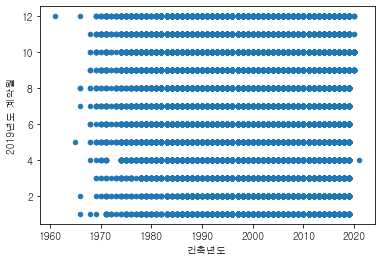

In [230]:
plt.figure(figsize=(20,50))
train_years.groupby('계약년도').get_group('2019').plot.scatter(x='건축년도',y='계약월')
plt.ylabel('2019년도 계약월')

Text(0, 0.5, '2018년도 계약월')

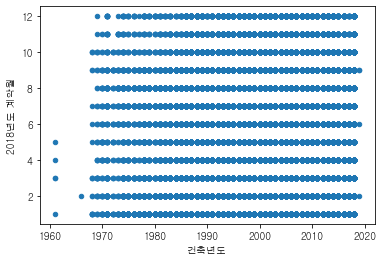

In [234]:
train_years.groupby('계약년도').get_group('2018').plot.scatter(x='건축년도',y='계약월')
plt.ylabel('2018년도 계약월')

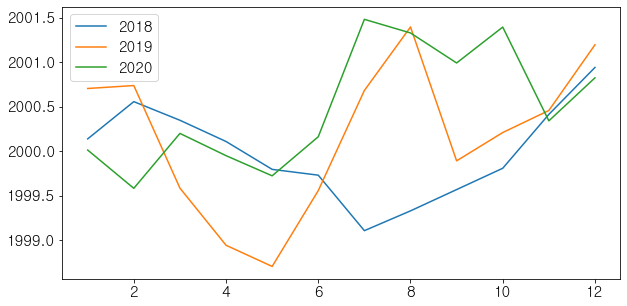

In [246]:
# train_years.groupby('계약년도').get_group('2019').plot.scatter(x='건축년도',y='계약월').mean()
# plt.ylabel('2019년도 계약월')
train_data_grouped_ym_mean_2018 = train[train['계약년도']=='2018'].groupby(train['계약월'])['건축년도'].mean()
train_data_grouped_ym_mean_2019 = train[train['계약년도']=='2019'].groupby(train['계약월'])['건축년도'].mean()
train_data_grouped_ym_mean_2020 = train[train['계약년도']=='2020'].groupby(train['계약월'])['건축년도'].mean()
plt.rc('font', size=15)
fig=plt.figure(figsize=(10, 5))
plt.plot(train_data_grouped_ym_mean_2018, label = '2018')
plt.plot(train_data_grouped_ym_mean_2019, label = '2019')
plt.plot(train_data_grouped_ym_mean_2020, label = '2020')
plt.legend()

<AxesSubplot:xlabel='건축년도'>

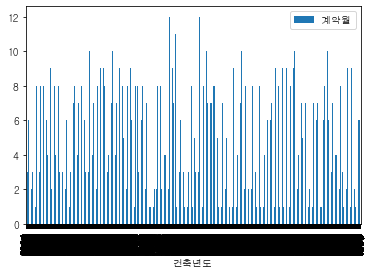

In [232]:
train_years.groupby('계약년도').get_group('2018').plot.bar(x='건축년도',y='계약월')

In [23]:
train['건축년도'].describe(include='all')

count    240921.000000
mean       2000.225377
std           9.667101
min        1961.000000
25%        1994.000000
50%        2001.000000
75%        2007.000000
max        2021.000000
Name: 건축년도, dtype: float64

##### 건축년도가 2021년이지만 계약년월이 19년, 20년도에  있는 것으로 보아 분양 아파트 매매 건수

## 전용면적

In [104]:
train.rename(columns={'전용면적(㎡)':'전용면적'}, inplace=True)

In [106]:
train['전용면적'].describe(include='all')

count    240921.000000
mean         77.932687
std          30.414776
min          10.020000
25%          59.720000
50%          83.420000
75%          84.970000
max         395.060000
Name: 전용면적, dtype: float64

In [112]:
train['전용면적'].value_counts().sort_values()

65.105        1
42.590        1
26.665        1
107.810       1
191.020       1
           ... 
59.990     3005
84.990     4406
84.970     4409
84.980     4417
84.960     4555
Name: 전용면적, Length: 10829, dtype: int64

## 이상치 찾기

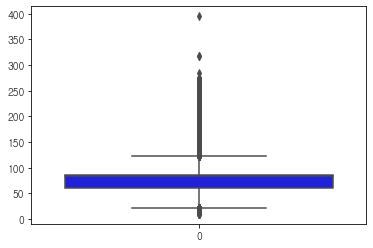

In [118]:
plt.figure()
sns.boxplot(data=train['전용면적'], color='blue')
plt.show()

#### 면적은 Log 정규화 

In [121]:
train

,시군구,단지명,전용면적,계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19
